In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns

In [2]:
# Uncomment this to make the matplotlib plots more interactive. 
# But it also makes it slower.

#%matplotlib notebook

In [3]:
pd.set_option('precision', 2)

In [4]:
n_targets=15
ligands=["1a", "23a", "23g", "23h", "1g", "LBA", "C12"]
variants = ['wt', 'd73n','y56f','w60f']
n_runs=3

In [5]:
def read_docking_results(results_dir):
    """ 
    Reads the docking results from DIR
    """
    # Log filenames are like: LOG_07_1a_1_ex-128.log
    # Targets are named from 0... n_targets -1

    results = pd.DataFrame(columns=["Ligand","Target","Run 1", "Run 2", "Run 3"])
    record = {}
    for ligand in ligands:
        record["Variant"] = results_dir
        record["Ligand"] = ligand
        for target in range(n_targets):
            record["Target"] = target

            # Runs are named 1 ... n_runs
            for run in range(1,n_runs+1):
                this_run = f"Run {run}"
                logfile = pathlib.Path.cwd() / results_dir / f"LOG_{target:02d}_{ligand}_{run}_ex-128.log"
                # print(f"target:{target:02d} + Ligand:{ligand}: Run #{run} ==> file: {logfile}")
                with open(logfile, "r") as lf:
                    found = False
                    while not found:
                        line = lf.readline()
                        if line[0:4] == "   1":
                            vina_score = line.split()[1]
                            # print("Vina score = ", vina_score)
                            record[this_run] = float(vina_score)
                            found = True
            results = results.append(record, ignore_index=True)
    results["Avg"] = results[["Run 1","Run 2","Run 3"]].mean(axis=1)
    return results[["Variant","Ligand","Target","Run 1", "Run 2", "Run 3","Avg"]]

# Docking Energies

## Wild Type LasR

In [54]:
wt = read_docking_results('wt')

best_wt = wt.loc[wt.groupby(["Ligand"])["Avg"].idxmin()]
best_wt

,Variant,Ligand,Target,Run 1,Run 2,Run 3,Avg
8,wt,1a,8,-9.7,-9.6,-9.6,-9.63
70,wt,1g,10,-9.3,-9.0,-9.1,-9.13
27,wt,23a,12,-9.2,-9.1,-9.2,-9.17
42,wt,23g,12,-9.3,-9.0,-9.0,-9.10
53,wt,23h,8,-9.0,-8.9,-9.0,-8.97
102,wt,C12,12,-9.0,-8.9,-8.9,-8.93
77,wt,LBA,2,-7.3,-7.4,-7.3,-7.33


In [58]:
wt[ wt['Target'] == 12 ]

,Variant,Ligand,Target,Run 1,Run 2,Run 3,Avg
12,wt,1a,12,-9.6,-9.4,-9.6,-9.53
27,wt,23a,12,-9.2,-9.1,-9.2,-9.17
42,wt,23g,12,-9.3,-9.0,-9.0,-9.10
57,wt,23h,12,-8.9,-9.0,-8.9,-8.93
72,wt,1g,12,-8.7,-8.8,-8.7,-8.73
87,wt,LBA,12,-7.2,-7.2,-7.2,-7.20
102,wt,C12,12,-9.0,-8.9,-8.9,-8.93


In [59]:
wt[ wt['Target'] == 8 ]

,Variant,Ligand,Target,Run 1,Run 2,Run 3,Avg
8,wt,1a,8,-9.7,-9.6,-9.6,-9.63
23,wt,23a,8,-8.9,-8.8,-8.9,-8.87
38,wt,23g,8,-9.0,-8.8,-8.9,-8.90
53,wt,23h,8,-9.0,-8.9,-9.0,-8.97
68,wt,1g,8,-8.5,-8.8,-8.6,-8.63
83,wt,LBA,8,-7.0,-7.0,-7.0,-7.00
98,wt,C12,8,-8.1,-8.2,-8.2,-8.17


In [7]:
# The worst values
wt.loc[wt.groupby(["Ligand"])["Avg"].idxmax()]

,Variant,Ligand,Target,Run 1,Run 2,Run 3,Avg
0,wt,1a,0,-6.7,-6.8,-6.5,-6.67
60,wt,1g,0,-7.6,-7.6,-7.6,-7.60
15,wt,23a,0,-6.2,-6.1,-6.2,-6.17
30,wt,23g,0,-6.3,-5.9,-6.0,-6.07
45,wt,23h,0,-5.8,-5.9,-5.8,-5.83
90,wt,C12,0,-7.3,-7.2,-7.3,-7.27
80,wt,LBA,5,-6.6,-6.8,-6.8,-6.73


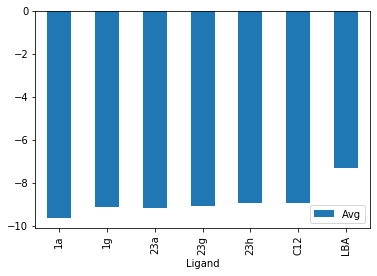

In [8]:
best_wt.plot.bar(x="Ligand", y="Avg")

In [9]:
best_wt.to_csv("best_results_wt.csv")

In [10]:
# wt.columns
# wt.style.format({'Avg': '{:.2f}'})
# wt.groupby(["Ligand"]).plot.scatter(x=["Target"], y=["Avg"])

## D73N Mutant

In [11]:
d73n = read_docking_results('d73n')

In [12]:
best_d73n = d73n.loc[d73n.groupby(["Ligand"])["Avg"].idxmin()]
best_d73n

,Variant,Ligand,Target,Run 1,Run 2,Run 3,Avg
4,d73n,1a,4,-9.9,-9.4,-9.8,-9.70
68,d73n,1g,8,-9.0,-9.0,-9.0,-9.00
19,d73n,23a,4,-9.3,-9.3,-9.4,-9.33
34,d73n,23g,4,-9.2,-9.3,-9.3,-9.27
49,d73n,23h,4,-8.9,-9.1,-9.0,-9.00
94,d73n,C12,4,-8.8,-8.7,-8.9,-8.80
82,d73n,LBA,7,-7.2,-7.2,-7.3,-7.23


In [13]:
# The worst values
d73n.loc[d73n.groupby(["Ligand"])["Avg"].idxmax()]

,Variant,Ligand,Target,Run 1,Run 2,Run 3,Avg
13,d73n,1a,13,-2.3,-2.1,-1.0,-1.80
65,d73n,1g,5,-4.4,-3.7,-4.5,-4.20
28,d73n,23a,13,-1.1,-0.7,-0.7,-0.83
43,d73n,23g,13,-0.8,-1.5,-0.5,-0.93
58,d73n,23h,13,-1.8,-0.8,-2.8,-1.80
95,d73n,C12,5,-4.4,-4.4,-4.4,-4.40
80,d73n,LBA,5,-4.3,-4.3,-4.3,-4.30


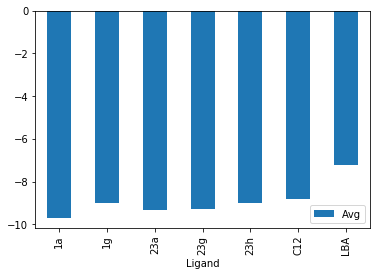

In [14]:
best_d73n.plot.bar(x="Ligand", y="Avg")

In [15]:
best_d73n.to_csv("best_results_d73n.csv")

## Y56F Mutant

In [16]:
y56f = read_docking_results('y56f')

In [17]:
best_y56f = y56f.loc[y56f.groupby(["Ligand"])["Avg"].idxmin()]
best_y56f

,Variant,Ligand,Target,Run 1,Run 2,Run 3,Avg
8,y56f,1a,8,-9.3,-9.3,-9.8,-9.47
68,y56f,1g,8,-9.4,-9.2,-9.4,-9.33
28,y56f,23a,13,-8.9,-8.7,-8.7,-8.77
41,y56f,23g,11,-9.2,-8.9,-9.1,-9.07
56,y56f,23h,11,-9.0,-8.8,-9.1,-8.97
92,y56f,C12,2,-8.6,-8.5,-8.4,-8.50
83,y56f,LBA,8,-7.6,-7.6,-7.6,-7.60


In [18]:
best_y56f.to_csv("best_results_y56f.csv")

## W60F Mutant

In [19]:
w60f = read_docking_results('w60f')

In [20]:
best_w60f = w60f.loc[w60f.groupby(["Ligand"])["Avg"].idxmin()]
best_w60f

,Variant,Ligand,Target,Run 1,Run 2,Run 3,Avg
6,w60f,1a,6,-8.7,-9.0,-8.9,-8.87
68,w60f,1g,8,-8.9,-9.0,-9.0,-8.97
16,w60f,23a,1,-8.5,-8.5,-8.1,-8.37
31,w60f,23g,1,-8.5,-8.6,-8.6,-8.57
51,w60f,23h,6,-8.6,-8.4,-8.5,-8.50
98,w60f,C12,8,-8.1,-8.3,-8.3,-8.23
88,w60f,LBA,13,-7.0,-7.2,-7.3,-7.17


In [21]:
best_w60f.to_csv("best_results_w60f.csv")

# Comparing Energies

According to the experimental results from Dr. Luesch's group, dosdecanamide A (molecule **1a**), should:

* **Activate** the W60F and wildtype
* **Have no effect** on Y56F and D73N variants.


In [22]:
best_1a = best_wt.loc[best_wt["Ligand"]=='1a'].copy()
best_1a = best_1a.append(best_d73n.loc[best_d73n["Ligand"]=='1a'], ignore_index=True)
best_1a = best_1a.append(best_y56f.loc[best_y56f["Ligand"]=='1a'], ignore_index=True)
best_1a = best_1a.append(best_w60f.loc[best_w60f["Ligand"]=='1a'], ignore_index=True)
best_1a.style.format({'Avg': '{:.2f}'})

,Variant,Ligand,Target,Run 1,Run 2,Run 3,Avg
0,wt,1a,8,-9.7,-9.6,-9.6,-9.63
1,d73n,1a,4,-9.9,-9.4,-9.8,-9.70
2,y56f,1a,8,-9.3,-9.3,-9.8,-9.47
3,w60f,1a,6,-8.7,-9,-8.9,-8.87


This is really bad: docking cannot differenticate between the variants, which means *vina* it **is not** recognizing the important interactions.

I can think of 2 possibilities to explain this:

1. The *Vina* energy function is not appropriate for this deep pocket
1. Incomplete sampling of the conformational space of the receptor
1. **More likely** the effect of mutation is not related to ligand binding, 
   but most probably with some chain dynamics that is important for the formation
   of the multimer.

In [23]:
best_1a.to_csv("best_1a.csv")

## Best of all

In [24]:
def get_best_results(ligand):
    _best = best_wt.loc[best_wt["Ligand"]==ligand].copy()
    _best = _best.append(best_d73n.loc[best_d73n["Ligand"]==ligand], ignore_index=True)
    _best = _best.append(best_y56f.loc[best_y56f["Ligand"]==ligand], ignore_index=True)
    _best = _best.append(best_w60f.loc[best_w60f["Ligand"]==ligand], ignore_index=True)
    return _best

In [80]:
get_best_results("23a")

,Variant,Ligand,Target,Run 1,Run 2,Run 3,Avg
0,wt,23a,12,-9.2,-9.1,-9.2,-9.17
1,d73n,23a,4,-9.3,-9.3,-9.4,-9.33
2,y56f,23a,13,-8.9,-8.7,-8.7,-8.77
3,w60f,23a,1,-8.5,-8.5,-8.1,-8.37


In [26]:
ligands

['1a', '23a', '23g', '23h', '1g', 'LBA', 'C12']

In [74]:
ligs = ['1a','23a', '23g','23h','1g','C12','LBA']
best_all = pd.DataFrame(columns=['Variant','Ligand','Target','Run 1','Run 2','Run 3','Avg'])
for ligand in ligs:
    best_all = best_all.append(get_best_results(ligand), ignore_index=True, sort=False)

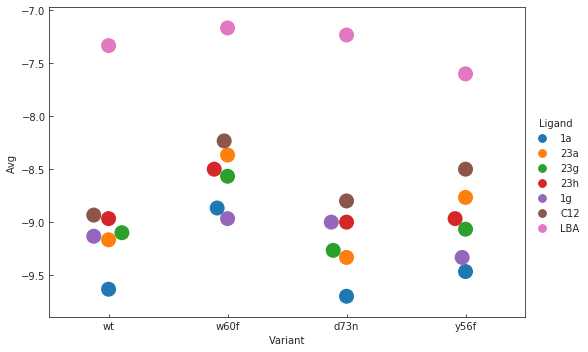

In [75]:
plot_style = {'xtick.bottom': True,
              'ytick.left': True,
              'xtick.direction': 'in',
              'ytick.direction': 'in'}

with sns.axes_style("white", plot_style):
    g = sns.catplot(data=best_all,
                    x="Variant",y="Avg", hue="Ligand", 
                    kind="swarm", s=15, aspect=1.5,
                    order=['wt','w60f','d73n','y56f'],
                    facet_kws={"despine":False}
                    
                   )
    g.savefig("best_all.jpg")


In [62]:
best_all.describe()

,Run 1,Run 2,Run 3,Avg
count,28.00,28.00,28.00,28.00
mean,-8.76,-8.71,-8.77,-8.75
std,0.73,0.65,0.71,0.69
min,-9.90,-9.60,-9.80,-9.70
25%,-9.22,-9.10,-9.12,-9.14
50%,-8.95,-8.90,-9.00,-8.97
75%,-8.57,-8.50,-8.47,-8.50
max,-7.00,-7.20,-7.30,-7.17


In [29]:
best_all.sort_values(by=['Variant','Ligand'])

,Variant,Ligand,Target,Run 1,Run 2,Run 3,Avg
1,d73n,1a,4,-9.9,-9.4,-9.8,-9.70
17,d73n,1g,8,-9.0,-9.0,-9.0,-9.00
5,d73n,23a,4,-9.3,-9.3,-9.4,-9.33
9,d73n,23g,4,-9.2,-9.3,-9.3,-9.27
13,d73n,23h,4,-8.9,-9.1,-9.0,-9.00
25,d73n,C12,4,-8.8,-8.7,-8.9,-8.80
21,d73n,LBA,7,-7.2,-7.2,-7.3,-7.23
3,w60f,1a,6,-8.7,-9.0,-8.9,-8.87
19,w60f,1g,8,-8.9,-9.0,-9.0,-8.97
7,w60f,23a,1,-8.5,-8.5,-8.1,-8.37


In [30]:
best_all.sort_values(by=['Variant','Ligand']).to_csv("best_all.dat", sep="\t", index=False, float_format="%.2f")

In [31]:
best_all.sort_values(by=['Variant','Ligand']).to_csv("best_all.csv", index=False, float_format="%.2f")

# Contacts

## Reading data

In [33]:
contacts = {}

for variant in variants:
    variant_dir = {}
    for ligand in ligands:
        filename = f"contacts/summary_{variant}-{ligand}.tsv"
        variant_dir[ligand] = pd.read_csv(filename, delim_whitespace=True)
    contacts[variant]=variant_dir

In [34]:
contacts['wt']['1a']

,Lig,LigAtom,Resid,ResAtom,Count
0,DDA,C4,Val76,HG11,9
1,DDA,C4,Val76,HG12,8
2,DDA,C4,Val76,HG13,4
3,DDA,C4,Ile52,HG12,1
4,DDA,C4,Ile52,HG13,11
...,...,...,...,...,...
5196,DDA,C5,Tyr47,CD2,17
5197,DDA,C27,Trp60,HZ2,3
5198,DDA,H11,Tyr47,HH,15
5199,DDA,C25,Gly68,HA2,2


In [35]:
contacts["wt"]["1a"].sort_values(by=['Count'], ascending=False)

,Lig,LigAtom,Resid,ResAtom,Count
4502,DDA,O3,Ser129,OG,172
4730,DDA,O3,Thr75,OG1,171
745,DDA,C15,Ser129,OG,156
3105,DDA,C12,Tyr64,OH,156
2786,DDA,C11,Tyr64,CE2,154
...,...,...,...,...,...
2108,DDA,C11,Leu40,CD1,1
2491,DDA,C10,Tyr64,HB3,1
4535,DDA,C1,Arg71,HA,1
2494,DDA,C23,Thr75,HG21,1


In [36]:
# Agrregate all counts by residue

aggr_by_res = {}

for variant in variants:
    variant_dic = {}
    for ligand in ligands:
        variant_dic[ligand] = contacts[variant][ligand].groupby(["Resid"])["Count"].sum()
        variant_dic[ligand] = variant_dic[ligand].reindex(sorted(variant_dic[ligand].index, key=lambda x: int(x[3:])))
    aggr_by_res[variant]=variant_dic

In [37]:
counts_by_res = {}

for variant in variants:
    variant_df = pd.DataFrame()
    
    for ligand in ligands:
        variant_df = variant_df.join(aggr_by_res["wt"][ligand], how="outer", rsuffix=ligand)
    variant_df.rename(columns=dict(zip(variant_df.columns, ligands)), inplace=True)
    variant_df.fillna(0,inplace=True)
    variant_df = variant_df.reindex(sorted(variant_df.index, key=lambda x: int(x[3:])))
    counts_by_res[variant] = variant_df

In [38]:
ligands

['1a', '23a', '23g', '23h', '1g', 'LBA', 'C12']

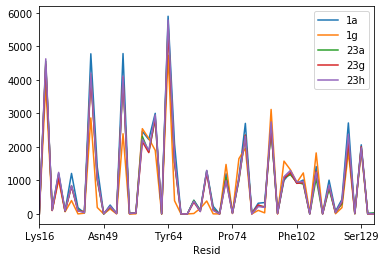

In [39]:
counts_by_res['wt'].plot(y=['1a','1g','23a', '23g','23h'])

## Plotting with Plot.ly

In [40]:
import plotly.graph_objects as go

In [41]:
ligands

['1a', '23a', '23g', '23h', '1g', 'LBA', 'C12']

In [73]:
fig = go.Figure()

for ligand in ['1a','23a', '23g','23h','1g','C12','LBA']:
    fig.add_trace(go.Scatter(x=counts_by_res['wt'].index, y=counts_by_res['wt'][ligand],
                             mode='lines', name=ligand))
title_font = {"size":14}
fig.update_layout(yaxis=dict(title_text="Counts", titlefont=title_font, 
                             showline=True, showgrid=False, linecolor='grey', gridcolor='lightgray',
                             mirror=True),
                  xaxis=dict(title_text="Residue", titlefont=title_font, tickangle=-45,
                            showline=True, showgrid=False, linecolor='gray', gridcolor='lightgray',
                            mirror=True),
                  plot_bgcolor='white',
                  annotations=[dict(x='Trp60', y=2300,
                                    text="Trp60",
                                    showarrow=True,
                                    arrowhead=2,
                                    ax=0,
                                    ay=-80,
                                    font=dict(color='red')),
                               dict(x='Tyr56', y=2500,
                                    text="Tyr56",
                                    showarrow=True,
                                    arrowhead=2,
                                    ax=-10,
                                    ay=-40,
                                    font=dict(color='red')),
                               dict(x='Asp73', y=1500,
                                    text="Asp73",
                                    showarrow=True,
                                    arrowhead=2,
                                    ax=0,
                                    ay=-40,
                                    font=dict(color='red')),
                               dict(x='Ser129', y=2400,
                                    text="Ser129",
                                    showarrow=True,
                                    arrowhead=2,
                                    ax=0,
                                    ay=-40,
                                    font=dict(color='red')),
                               dict(x='Tyr47', y=4800,
                                    text="Tyr47",
                                    showarrow=True,
                                    arrowhead=2,
                                    ax=0,
                                    ay=-40),
                               dict(x='Ile52', y=4800,
                                    text="Ile52",
                                    showarrow=True,
                                    arrowhead=2,
                                    ax=0,
                                    ay=-40),
                               dict(x='Trp88', y=3150,
                                    text="Trp88",
                                    showarrow=True,
                                    arrowhead=2,
                                    ax=0,
                                    ay=-40),
                               dict(x='Ala70', y=1300,
                                    text="Ala70",
                                    showarrow=True,
                                    arrowhead=2,
                                    ax=0,
                                    ay=-40),
                               dict(x='Tyr64', y=5900,
                                    text="Tyr64",
                                    showarrow=True,
                                    arrowhead=2,
                                    ax=60,
                                    ay=-10),
                               dict(x='Val76', y=2750,
                                    text="Val76",
                                    showarrow=True,
                                    arrowhead=2,
                                    ax=0,
                                    ay=-40)
                              ]
                 )
fig.update_annotations(dict(font_size=8))
fig.update_xaxes(ticks="inside",tickfont=dict(size=10))
fig.update_yaxes(tickfont=dict(size=10))
fig.update_layout(legend=dict(x=0.85, y=1.0,font_size=10))
fig.update_layout(margin=dict(l=80, r=30, t=30, b=70))
fig.show()
#fig.write_image("./counts.jpg",width=600, height=450, scale=3)

## Plotting with Seaborn

In [43]:
_ = counts_by_res['wt'].copy()
_["Residue"] = _.index

In [44]:
# The order of the residues in this plot is worng... Why??

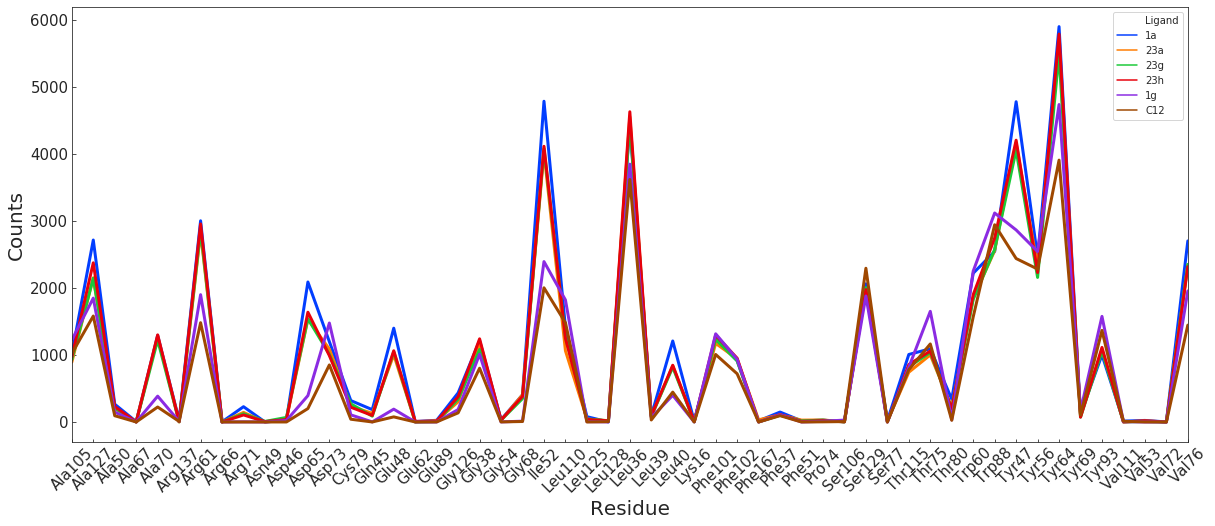

In [45]:
# For publication, usinig Seaborn
plot_style = {'xtick.bottom': True,
              'ytick.left': True,
              'xtick.direction': 'in',
              'ytick.direction': 'in', 'label':'big' }

plt.figure(figsize=(20,8))
with sns.axes_style("white", plot_style):
    #g = sns.scatterplot(data=pd.melt(_, id_vars='Residue', 
    g = sns.lineplot(data=pd.melt(_, id_vars='Residue', 
                                  value_vars=['1a','23a','23g','23h','1g','C12'], 
                                  var_name="Ligand", 
                                  value_name="Counts"),
                     x="Residue",
                     y="Counts", hue="Ligand",
                     palette="bright", 
                     linewidth=3)
    g.set_xlabel("Residue",fontsize=20)
    g.set_ylabel("Counts",fontsize=20)
    g.tick_params(labelsize=15)

plt.xticks(rotation=45)
plt.xlim(0,len(_.index)-1)
plt.show()
#g.savefig("best_all.svg")


In [46]:
g.axis()

(0.0, 52.0, -294.85, 6191.85)